# Recommendations for Microsoft's New Movie Studio

<img src="images/microsoft_logo.jpg" style="width:400px;height:170px"/>

**Author**: Martin Reyes

<hr style="border:1px solid gray"> </hr>

## Overview

This project analyzes what types of movies Microsoft should produce for their new movie studio. The analysis shows that Microsoft should focus on the Documentary, Biography, Drama, Romance, and Adventure genres. It's also shown the the best time to release these movies is at the end of the week, during March and April, and during November and December. Microsoft can use these recommendations to generate better ratings and profit. Lastly, Microsoft should expect the genres to maintain similar ratings over the next few years.

<hr style="border:1px solid gray"> </hr>

## Business Problem


<img src="images/top_rated_movies.jpg" style="width:400px;height:170px"/>


Microsoft has decided to create a new movie studio, and they need to determine what types of films to produce. Ratings generally reflect viewers' (consumer) attitude towards movie, so this will be the main subject to analyze. Each movie genre will be analyzed to see which produce the top ratings. Ratings will be compared by the timing of their release. Lastly, the top genres will be analyzed to see how each of their ratings are trending in the past five years.

<hr style="border:1px solid gray"> </hr>

## Data Understanding

Data from IMDb, TMDb, and The Numbers can be extracted to analyze movie ratings, profit, release dates, and other measures from thousands of movies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
%matplotlib inline

In [2]:
import matplotlib.dates as mdates
import calendar

In [3]:
csv_files = glob("data/*.csv.gz")

In [4]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename)
    csv_files_dict[filename_cleaned] = filename_df
csv_files_dict.keys()   

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

Renaming data frames to easily call them during data cleaning and analysis. Code will be easier to read.

In [5]:
imdb_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_ratings_df = csv_files_dict['imdb_title_ratings_gz']

In [6]:
tmdb_movies_df = csv_files_dict['tmdb_movies_gz']
tn_budgets_df = csv_files_dict['tn_movie_budgets_gz']

Checking to see if dataframes were added properly and their information.

In [7]:
dataframes = [] 
dataframes.append(imdb_basics_df) 
dataframes.append(imdb_ratings_df)

In [8]:
dataframes.append(tmdb_movies_df)
dataframes.append(tn_budgets_df)

In [9]:
for idx, df in enumerate(dataframes):
    print(f'df{idx}')
    print(df.info())
    display(dataframes[idx].head(2))
    print()

df0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"



df1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559



df2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610



df3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


<hr style="border:1px solid gray"> </hr>

## Data Cleaning

Each data frame will be cleaned by addressing missing values, duplicates, date time objects, and appropriate data.

### df1 imdb_basics

Looking at data frame description, information, duplicate rows, and missing values.

In [91]:
imdb_basics_df.describe()

,runtime_minutes
count,112233.000000
mean,86.261902
std,167.895938
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


In [93]:
imdb_basics_df.duplicated().sum();

TypeError: unhashable type: 'list'

In [12]:
imdb_basics_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
print(imdb_basics_df.columns)
print(imdb_basics_df.shape)
imdb_basics_df.head(3)

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [14]:
imdb_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Converting start year to datetime object

In [15]:
imdb_basics_df['start_year']=pd.to_datetime(imdb_basics_df['start_year'], 
                                            format="%Y")
imdb_basics_df['start_year'].head()

0   2013-01-01
1   2019-01-01
2   2018-01-01
3   2018-01-01
4   2017-01-01
Name: start_year, dtype: datetime64[ns]

Dropping movies with missing genres because a small percentage of movies lack genres, and these movies are likely unpopular and unsuccessful.

In [16]:
imdb_basics_df.dropna(subset=['genres'], inplace=True)
imdb_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

Splitting genres into multiple columns where there are more than one in a movie.

In [17]:
imdb_basics_df['genres_split'] = imdb_basics_df['genres'].map(lambda x: x.split(",") if x else x)
print(imdb_basics_df['genres_split'].map(lambda x: len(x)).max())
imdb_basics_df['genre1'] = imdb_basics_df['genres_split'].map(lambda x: x[0])
imdb_basics_df['genre2'] = imdb_basics_df['genres_split'].map(lambda x: x[1] if len(x) >= 2 else None)
imdb_basics_df['genre3'] = imdb_basics_df['genres_split'].map(lambda x: x[2] if len(x) == 3 else None)
imdb_basics_df.head()

3


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama","[Action, Crime, Drama]",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019-01-01,114.0,"Biography,Drama","[Biography, Drama]",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018-01-01,122.0,Drama,[Drama],Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018-01-01,NaN,"Comedy,Drama","[Comedy, Drama]",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017-01-01,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",Comedy,Drama,Fantasy


<hr style="border:1px solid black"> </hr>

### df2 imdb_ratings

In [18]:
imdb_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [19]:
imdb_ratings_df.duplicated().sum()

0

In [20]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Taking out the bottom half of movies with less than 50 number of votes as unfamiliar movies may produce unfamiliar results later.

In [21]:
imdb_ratings_df = imdb_ratings_df.query('numvotes >= 50')

In [22]:
print(imdb_ratings_df.columns)
print(imdb_ratings_df.shape)
imdb_ratings_df.head()

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')
(36824, 3)


,tconst,averagerating,numvotes
1,tt10384606,8.9,559
3,tt1043726,4.2,50352
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571


<hr style="border:1px solid black"> </hr>

### df3 tmdb_movies

In [23]:
tmdb_movies_df.describe();

In [24]:
tmdb_movies_df.duplicated().sum();

In [25]:
tmdb_movies_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [26]:
print(tmdb_movies_df.columns)
print(tmdb_movies_df.shape)
tmdb_movies_df.head(2)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
(26517, 10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [27]:
tmdb_movies_df['release_date']=pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df['release_date'][:2]

0   2010-11-19
1   2010-03-26
Name: release_date, dtype: datetime64[ns]

<hr style="border:1px solid black"> </hr>

### df4 tn_budgets

In [28]:
tn_budgets_df.duplicated().sum()

0

In [29]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [30]:
print(tn_budgets_df.columns)
print(tn_budgets_df.shape)
tn_budgets_df.head()

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
tn_budgets_df['release_date']=pd.to_datetime(tn_budgets_df['release_date'])
tn_budgets_df['release_date'][:2]

0   2009-12-18
1   2011-05-20
Name: release_date, dtype: datetime64[ns]

Renaming "movie" column to "title" for clarity.

In [32]:
tn_budgets_df.rename(columns={'movie':'title'}, inplace=True)
tn_budgets_df.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Converting currency columns into integer objects

In [33]:
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace('$', '').str.replace(',','').astype('int')
    return df

In [34]:
cols_to_convert = ['production_budget','domestic_gross','worldwide_gross']

for col in cols_to_convert:
    tn_budgets_df = convert_col_to_int(tn_budgets_df, col)

Creating "foreign_gross" column.

In [35]:
tn_budgets_df['foreign_gross'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['domestic_gross']

Checking for values and distribution in "domestic_gross" and "foreign_gross" column. Values of 0 will be dropped.

In [36]:
tn_budgets_df['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64

<AxesSubplot:>

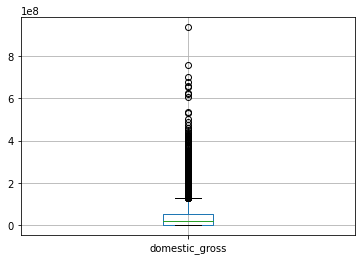

In [37]:
tn_budgets_df['domestic_gross'].to_frame().boxplot()

In [38]:
tn_budgets_df = tn_budgets_df.query('domestic_gross > 0')

In [39]:
tn_budgets_df['foreign_gross'].value_counts()

0             1252
10000000         8
3000000          7
14000000         6
53000000         6
              ... 
313800000        1
1369318718       1
24738714         1
189238587        1
26456108         1
Name: foreign_gross, Length: 3828, dtype: int64

<AxesSubplot:>

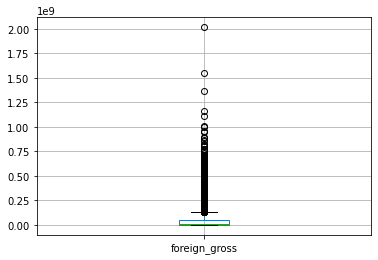

In [40]:
tn_budgets_df['foreign_gross'].to_frame().boxplot()

In [41]:
tn_budgets_df = tn_budgets_df.query('foreign_gross > 0')

Checking if domestic gross plus foreign gross equal worldwide gross.

In [42]:
assert1 = tn_budgets_df['domestic_gross']
assert2 = tn_budgets_df['foreign_gross']
assert1and2df = (assert1 + assert2).to_frame().rename(columns={0:'worldwide_gross'})
assert3 = tn_budgets_df['worldwide_gross']

Can't use assert statement so manually checking.

In [43]:
(assert1 + assert2).to_frame().rename(columns={0:'worldwide_gross'}).head()

,worldwide_gross
0,2776345279
1,1045663875
2,149762350
3,1403013963
4,1316721747


In [44]:
assert3.to_frame().head()

,worldwide_gross
0,2776345279
1,1045663875
2,149762350
3,1403013963
4,1316721747


Creating profit columns.

In [45]:
tn_budgets_df['domestic_profit'] = tn_budgets_df['domestic_gross'] - tn_budgets_df['production_budget']
tn_budgets_df['foreign_profit'] = tn_budgets_df['foreign_gross'] - tn_budgets_df['production_budget']
tn_budgets_df['worldwide_profit'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']

Reviewing data frame.

In [46]:
print(tn_budgets_df.columns)
print(tn_budgets_df.shape)
tn_budgets_df.head()

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'foreign_gross', 'domestic_profit', 'foreign_profit',
       'worldwide_profit'],
      dtype='object')
(3982, 10)


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747


There are about 4000 data points.

<hr style="border:1px solid black"> </hr>

### df 5 imdb_combined

Combining two IMDb data frames.

In [47]:
imdb_basics_df.set_index('tconst', inplace=True)
imdb_df = imdb_ratings_df.join(imdb_basics_df, on='tconst')
imdb_basics_df.reset_index(inplace=True)

In [48]:
imdb_df.drop(columns=['original_title'], axis=1, inplace=True)

In [49]:
print(imdb_df.shape)
imdb_df.isna().sum()

(36824, 11)


tconst                 0
averagerating          0
numvotes               0
primary_title         73
start_year            73
runtime_minutes     1510
genres                73
genres_split          73
genre1                73
genre2             14925
genre3             25550
dtype: int64

Dropping movies without genres. 

In [50]:
imdb_df= imdb_df.dropna(subset=['genres'])
imdb_df.isna().sum()

tconst                 0
averagerating          0
numvotes               0
primary_title          0
start_year             0
runtime_minutes     1437
genres                 0
genres_split           0
genre1                 0
genre2             14852
genre3             25477
dtype: int64

In [51]:
print(imdb_df['tconst'].duplicated().sum())
print(imdb_df.shape)
imdb_df.head(3)

0
(36751, 11)


,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
1,tt10384606,8.9,559,Borderless,2019-01-01,87.0,Documentary,[Documentary],Documentary,None,None
3,tt1043726,4.2,50352,The Legend of Hercules,2014-01-01,99.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action,Adventure,Fantasy
5,tt1069246,6.2,326,Habana Eva,2010-01-01,106.0,"Comedy,Romance","[Comedy, Romance]",Comedy,Romance,None


<hr style="border:1px solid gray"> </hr>

## Data Analysis

### Which movie genres produce the best ratings?

#### Create dataframe to analyze popularity and average rating by genre

Merging IMDb and TMDb data frames on title name as this is the only common column between the two. 3,490 movies with similar titles have to be dropped.

In [52]:
best_ratings_df = imdb_df #initialize df
best_ratings_df = pd.merge(tmdb_movies_df, best_ratings_df, left_on = 'title',
                                       right_on = 'primary_title', how = 'inner')
best_ratings_df = best_ratings_df.drop(columns = 'primary_title', axis = 1)
print(best_ratings_df.shape)
print(best_ratings_df['title'].duplicated().sum())
best_ratings_df.drop_duplicates(subset=['title'], inplace=True)
print(best_ratings_df.shape)
print(best_ratings_df['title'].duplicated().sum())
best_ratings_df.head()

(16395, 20)
3490
(12905, 20)
0


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,7.7,425530,2010-01-01,146.0,"Adventure,Fantasy,Mystery","[Adventure, Fantasy, Mystery]",Adventure,Fantasy,Mystery
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,8.1,611299,2010-01-01,98.0,"Action,Adventure,Animation","[Action, Adventure, Animation]",Action,Adventure,Animation
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,7.0,657690,2010-01-01,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
3,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,8.8,1841066,2010-01-01,148.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
4,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,5.9,165108,2010-01-01,118.0,"Adventure,Family,Fantasy","[Adventure, Family, Fantasy]",Adventure,Family,Fantasy


Generating a dictionary of all of genres with their movie counts.

In [53]:
all_genres = set()
for genre in best_ratings_df['genres_split']:
    if genre:
        all_genres.update(genre)
all_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [54]:
genre_count_dict = {}
for genre in all_genres:
    genre_count_dict[genre] = 0

In [55]:
def genre_counter(List):
    for genre in genre_count_dict.keys():
        if genre in List:
            genre_count_dict[genre] += 1
            
best_ratings_df['genres_split'].map(genre_counter)
genre_count_dict

{'Sport': 259,
 'Animation': 381,
 'Fantasy': 521,
 'Crime': 1286,
 'Thriller': 2342,
 'Mystery': 829,
 'Romance': 1366,
 'Sci-Fi': 732,
 'Adult': 1,
 'Adventure': 1048,
 'War': 171,
 'Comedy': 3287,
 'News': 98,
 'Reality-TV': 1,
 'Game-Show': 1,
 'History': 470,
 'Documentary': 2244,
 'Music': 354,
 'Family': 587,
 'Musical': 101,
 'Western': 88,
 'Horror': 2264,
 'Drama': 5720,
 'Action': 1798,
 'Biography': 835}

With the movie counts by genres, I will find the average rating's by genre (groupby) for each IMDb and TMDb. The average will be for each of the three genre columns.

In [56]:
for i in range(3): 
    display(best_ratings_df.groupby(f'genre{str(i+1)}')[['averagerating', 'vote_average']].count())

,averagerating,vote_average
genre1,,
Action,1798,1798
Adult,1,1
Adventure,570,570
Animation,136,136
Biography,734,734
Comedy,2592,2592
Crime,626,626
Documentary,1600,1600
Drama,2886,2886


,averagerating,vote_average
genre2,,
Adventure,478,478
Animation,196,196
Biography,93,93
Comedy,472,472
Crime,531,531
Documentary,541,541
Drama,2237,2237
Family,275,275
Fantasy,238,238


,averagerating,vote_average
genre3,,
Animation,49,49
Biography,8,8
Comedy,223,223
Crime,129,129
Documentary,103,103
Drama,597,597
Family,222,222
Fantasy,210,210
History,247,247


Check genre counts in each genre column and drop rows with less than 30 values.

In [57]:
filt1 = best_ratings_df.groupby('genre1')[['averagerating', 'vote_average']].count() > 30
gen1_group_df = best_ratings_df.groupby('genre1')[['averagerating', 'vote_average']].median()[filt1]
gen1_group_df = gen1_group_df.dropna()
gen1_group_df

,averagerating,vote_average
genre1,,
Action,5.60,5.60
Adventure,6.20,6.20
Animation,6.50,6.45
Biography,7.00,6.90
Comedy,5.80,5.80
Crime,5.80,5.80
Documentary,7.10,6.95
Drama,6.10,6.00
Family,5.30,5.20


In [58]:
filt2 = best_ratings_df.groupby('genre2')[['averagerating', 'vote_average']].count() > 30
gen2_group_df = best_ratings_df.groupby('genre2')[['averagerating', 'vote_average']].median()[filt2]
gen2_group_df = gen2_group_df.dropna()
gen2_group_df

,averagerating,vote_average
genre2,,
Adventure,5.8,5.90
Animation,6.3,6.20
Biography,7.1,6.90
Comedy,5.9,6.00
Crime,6.0,5.90
Documentary,7.2,7.00
Drama,6.2,6.10
Family,6.0,6.00
Fantasy,5.7,5.80


In [59]:
filt3 = best_ratings_df.groupby('genre3')[['averagerating', 'vote_average']].count() > 30
gen3_group_df = best_ratings_df.groupby('genre3')[['averagerating', 'vote_average']].median()[filt3]
gen3_group_df = gen3_group_df.dropna()
gen3_group_df

,averagerating,vote_average
genre3,,
Animation,6.80,6.70
Comedy,6.00,6.00
Crime,6.10,6.10
Documentary,7.10,7.00
Drama,6.50,6.30
Family,6.20,6.10
Fantasy,6.00,6.00
History,6.90,6.70
Horror,5.20,5.30


--- 
##### Create IMDb average rating series to plot

IMDb average ratings

In [60]:
imdb1_rats_df = gen1_group_df['averagerating'].to_frame() #imdb average ratings
imdb2_rats_df = gen2_group_df['averagerating'].to_frame()
imdb3_rats_df = gen3_group_df['averagerating'].to_frame()

In [61]:
irating_df = imdb1_rats_df.join(imdb2_rats_df, rsuffix="2", 
                              how="outer").join(imdb3_rats_df, rsuffix="3", how = "outer")
irating_df = irating_df.reset_index() # make genre first col
irating_df

,index,averagerating,averagerating2,averagerating3
0,Action,5.60,NaN,NaN
1,Adventure,6.20,5.8,NaN
2,Animation,6.50,6.3,6.80
3,Biography,7.00,7.1,NaN
4,Comedy,5.80,5.9,6.00
5,Crime,5.80,6.0,6.10
6,Documentary,7.10,7.2,7.10
7,Drama,6.10,6.2,6.50
8,Family,5.30,6.0,6.20
9,Fantasy,4.60,5.7,6.00


Transposing data frame to take aggregate the mean of average ratings.

In [62]:
irating_df = irating_df.transpose() #can only run once
new_header = irating_df.iloc[0] #grab the first row for the header
irating_df = irating_df[1:] #take the data less the header row
irating_df.columns = new_header #set the header row as the df header
irating_df

index,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
averagerating,5.6,6.2,6.5,7,5.8,5.8,7.1,6.1,5.3,4.6,...,NaN,NaN,5.25,NaN,5.9,3.9,NaN,5,NaN,NaN
averagerating2,NaN,5.8,6.3,7.1,5.9,6,7.2,6.2,6,5.7,...,6.8,5.9,5.4,7.3,6.1,4.8,6.8,5,6.7,6
averagerating3,NaN,NaN,6.8,NaN,6,6.1,7.1,6.5,6.2,6,...,6.9,6.05,5.7,7.2,6,5.7,7,5.3,6.35,5.9


In [63]:
avg_iratings_se = irating_df.mean().sort_values()
avg_iratings_se #first barh subplot

index
Horror         4.766667
Sci-Fi         4.800000
Thriller       5.100000
Fantasy        5.433333
Mystery        5.450000
Action         5.600000
Family         5.833333
Comedy         5.900000
Western        5.950000
Crime          5.966667
Musical        5.975000
Romance        6.000000
Adventure      6.000000
Drama          6.266667
War            6.525000
Animation      6.533333
Music          6.850000
Sport          6.900000
History        6.900000
Biography      7.050000
Documentary    7.133333
News           7.250000
dtype: float64

--- 
##### Create movie count series to plot to compare to imdb ratings

First, creating second genre count dictionary with the same indexes (in same order) as the series above.

In [64]:
genre_count_dict2 = {}
for key in avg_iratings_se.index:
    genre_count_dict2[key] = genre_count_dict[key]
genre_count_dict2

{'Horror': 2264,
 'Sci-Fi': 732,
 'Thriller': 2342,
 'Fantasy': 521,
 'Mystery': 829,
 'Action': 1798,
 'Family': 587,
 'Comedy': 3287,
 'Western': 88,
 'Crime': 1286,
 'Musical': 101,
 'Romance': 1366,
 'Adventure': 1048,
 'Drama': 5720,
 'War': 171,
 'Animation': 381,
 'Music': 354,
 'Sport': 259,
 'History': 470,
 'Biography': 835,
 'Documentary': 2244,
 'News': 98}

In [65]:
gen_count_df = pd.DataFrame.from_dict(genre_count_dict2, orient='index')
gen_count_se = gen_count_df.squeeze()
gen_count_se #second barh subplot

Horror         2264
Sci-Fi          732
Thriller       2342
Fantasy         521
Mystery         829
Action         1798
Family          587
Comedy         3287
Western          88
Crime          1286
Musical         101
Romance        1366
Adventure      1048
Drama          5720
War             171
Animation       381
Music           354
Sport           259
History         470
Biography       835
Documentary    2244
News             98
Name: 0, dtype: int64

--- 
##### Create TMDb average rating series to plot

IMDb average ratings

In [66]:
tmdb1_vote_df = gen1_group_df['vote_average'].to_frame() #tmdb average ratings
tmdb2_vote_df = gen2_group_df['vote_average'].to_frame()
tmdb3_vote_df = gen3_group_df['vote_average'].to_frame()

In [67]:
tvote_df = tmdb1_vote_df.join(tmdb2_vote_df, rsuffix="2", 
                              how="outer").join(tmdb3_vote_df, rsuffix="3", how = "outer")
tvote_df = tvote_df.reset_index() # make genre first col
tvote_df

,index,vote_average,vote_average2,vote_average3
0,Action,5.60,NaN,NaN
1,Adventure,6.20,5.90,NaN
2,Animation,6.45,6.20,6.70
3,Biography,6.90,6.90,NaN
4,Comedy,5.80,6.00,6.00
5,Crime,5.80,5.90,6.10
6,Documentary,6.95,7.00,7.00
7,Drama,6.00,6.10,6.30
8,Family,5.20,6.00,6.10
9,Fantasy,4.80,5.80,6.00


Transposing data frame to take aggregate the mean of average ratings.

In [68]:
tvote_df = tvote_df.transpose() #can only run once
new_header2 = tvote_df.iloc[0] #grab the first row for the header
tvote_df = tvote_df[1:] #take the data less the header row
tvote_df.columns = new_header2 #set the header row as the df header
tvote_df

index,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
vote_average,5.6,6.2,6.45,6.9,5.8,5.8,6.95,6,5.2,4.8,...,NaN,NaN,5.45,NaN,6,4.3,NaN,5,NaN,NaN
vote_average2,NaN,5.9,6.2,6.9,6,5.9,7,6.1,6,5.8,...,6.8,5.95,5.4,7,6,5,6.5,5.2,6.4,5.8
vote_average3,NaN,NaN,6.7,NaN,6,6.1,7,6.3,6.1,6,...,6.7,6.25,5.8,7,6,5.7,6.6,5.4,6.2,6


In [69]:
# Mean popularity calculated
avg_tvote_se = tvote_df.mean().sort_values()
avg_tvote_se #third barh subplot

index
Horror         4.900000
Sci-Fi         5.000000
Thriller       5.200000
Fantasy        5.533333
Mystery        5.550000
Action         5.600000
Family         5.766667
Western        5.900000
Crime          5.933333
Comedy         5.933333
Romance        6.000000
Adventure      6.050000
Musical        6.100000
Drama          6.133333
War            6.300000
Animation      6.450000
Sport          6.550000
History        6.700000
Music          6.750000
Biography      6.900000
Documentary    6.983333
News           7.000000
dtype: float64

--- 
#####  DataViz for rating

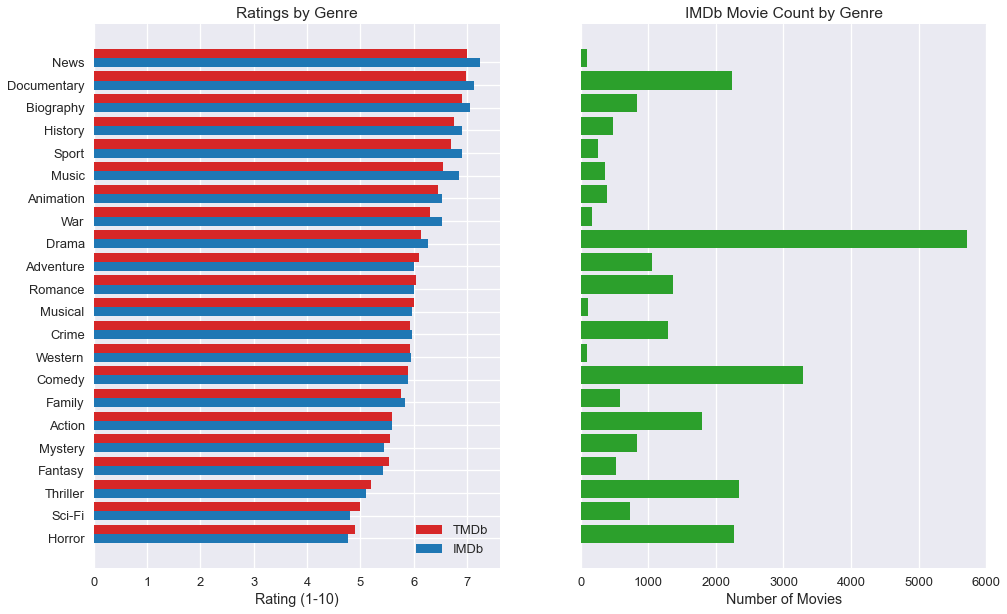

In [70]:
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(16,10))

width = .4
genres = [genre for genre in avg_iratings_se.index]
bar1 = np.arange(len(genres))
bar2 = [i+width for i in bar1]

ax1 = fig.add_subplot(121)
ax1.barh(bar2, avg_tvote_se, width, label='TMDb', color='tab:red')
ax1.barh(bar1, avg_iratings_se, width, label='IMDb',color='tab:blue')
ax1.set_title('Ratings by Genre')
ax1.set_xlabel('Rating (1-10)')
ax1.set_yticks(bar1)
ax1.set_yticklabels(genres)
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.barh(gen_count_se.index, gen_count_se, color='tab:green')
ax2.set_title('IMDb Movie Count by Genre')
ax2.set_xlabel('Number of Movies')
ax2.yaxis.set_visible(False)

plt.savefig('images/ratings_genre.png')

The "Ratings by Genre" bar graph shows that the top, popular genres are Documentary, Biography, Drama, Romance, and Adventure. The unpopular ones are Horror, Sci-Fi, Thriller, Mystery, and Action.

### According to the ratings, when is the best time to release movies by weekday and month?



#### Create dataframe with time and ratings

Only using IMDb ratings since they're in a similar order to TMDb's ratings.

In [71]:
print(best_ratings_df.shape)
best_ratings_df.head(3)

(12905, 20)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,7.7,425530,2010-01-01,146.0,"Adventure,Fantasy,Mystery","[Adventure, Fantasy, Mystery]",Adventure,Fantasy,Mystery
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,8.1,611299,2010-01-01,98.0,"Action,Adventure,Animation","[Action, Adventure, Animation]",Action,Adventure,Animation
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,7.0,657690,2010-01-01,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi


Selecting 3 appropriate columns

In [72]:
release_df = best_ratings_df[['release_date','popularity','averagerating']]
print(release_df.shape)
print(release_df.columns)
release_df.head(3)

(12905, 3)
Index(['release_date', 'popularity', 'averagerating'], dtype='object')


,release_date,popularity,averagerating
0,2010-11-19,33.533,7.7
1,2010-03-26,28.734,8.1
2,2010-05-07,28.515,7.0


Adding year and month columns columns

In [73]:
release_df = release_df.set_index('release_date')

In [74]:
release_df['year'] = release_df.index.year
release_df['month'] = release_df.index.month
release_df['weekday'] = release_df.index.weekday
release_df['weekday_name'] = release_df.index.day_name()
release_df['is_weekend'] = release_df['weekday'].isin((5,6))
release_df.head(3)

,popularity,averagerating,year,month,weekday,weekday_name,is_weekend
release_date,,,,,,,
2010-11-19,33.533,7.7,2010,11,4,Friday,False
2010-03-26,28.734,8.1,2010,3,4,Friday,False
2010-05-07,28.515,7.0,2010,5,4,Friday,False


In [75]:
date_cols = ['release_date','year','month','weekday','weekday_name', 'is_weekend']
release_df[date_cols[1]].value_counts().to_frame()

,year
2013,1646
2014,1597
2015,1530
2016,1522
2017,1506
2012,1351
2011,1344
2018,1319
2010,1022
2019,52


There is enough data in each: 'month','weekday','weekday_name', and 'is_weekend.' For 'year,' only use 2010-2018.

In [76]:
release_df = release_df[(release_df.index.year < 2019) & (release_df.index.year > 2009)]
release_df.describe()

,popularity,averagerating,year,month,weekday
count,12837.000000,12837.000000,12837.00000,12837.000000,12837.000000
mean,4.168276,5.790488,2014.14801,6.366830,3.337696
std,5.067626,1.367493,2.45706,3.490623,1.608908
min,0.600000,1.100000,2010.00000,1.000000,0.000000
25%,0.849000,4.900000,2012.00000,3.000000,2.000000
50%,2.059000,6.000000,2014.00000,6.000000,4.000000
75%,6.173000,6.800000,2016.00000,10.000000,4.000000
max,80.773000,9.500000,2018.00000,12.000000,6.000000


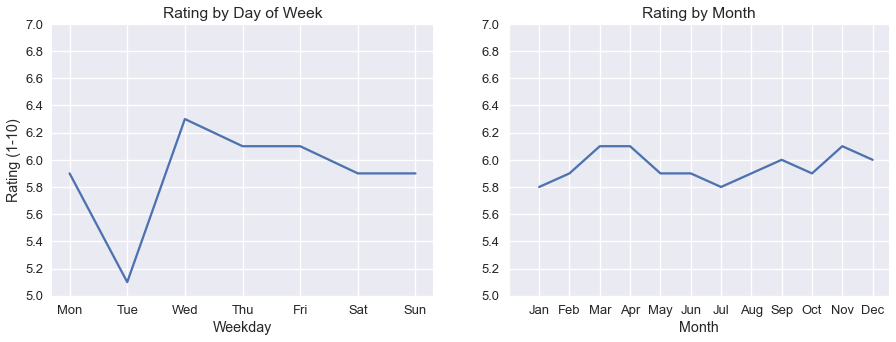

In [77]:
# ratings by day of the week and month
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1 = release_df.groupby('weekday')['averagerating'].median().plot()
ax1.set_title('Rating by Day of Week')
ax1.set_ylabel('Rating (1-10)')
ax1.set_xlabel('Weekday')
ax1.set_xticks(range(7))
ax1.set_xticklabels([calendar.day_name[idx][:3] for idx in range(7)]);
ax1.set_yticks([(x*.2)+5 for x in range(11)]);

ax2 = fig.add_subplot(122)
ax2 = release_df.groupby('month')['averagerating'].median().plot()
ax2.set_title('Rating by Month')
ax2.set_xlabel('Month')
ax2.set_xticks(range(13))
ax2.set_xticklabels([calendar.month_name[idx][:3] for idx in range(13)]);
ax2.set_yticks([(x*.2)+5 for x in range(11)]);

plt.savefig('images/ratings_by_day_and_mon.png')



The "Rating by Day of Week" and "Rating by Month" line charts show that the optimal time to release a movie, according to the ratings, is at the end of the week during March and April, and during November and December. 

### How are the top genres tending over the last few years?

#### See how the ratings have been trending from 2010-2018

In [78]:
print(best_ratings_df.shape)
best_ratings_df.head(3)

(12905, 20)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,7.7,425530,2010-01-01,146.0,"Adventure,Fantasy,Mystery","[Adventure, Fantasy, Mystery]",Adventure,Fantasy,Mystery
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,8.1,611299,2010-01-01,98.0,"Action,Adventure,Animation","[Action, Adventure, Animation]",Action,Adventure,Animation
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,7.0,657690,2010-01-01,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi


In [79]:
best_ratings_df['release_date'].dt.year.value_counts()

2013    1646
2014    1597
2015    1530
2016    1522
2017    1506
2012    1351
2011    1344
2018    1319
2010    1022
2019      52
2009       4
1986       2
2008       2
1997       1
1988       1
2007       1
1995       1
2005       1
1985       1
2006       1
1976       1
Name: release_date, dtype: int64

Only use 2014-2018 for five most recent years

In [80]:
br_dt_idx_df = best_ratings_df[['release_date','genres','genres_split',
                      'vote_average','averagerating']].set_index('release_date')

In [81]:
filterdt = (br_dt_idx_df.index.year < 2019) & (br_dt_idx_df.index.year > 2014)
br_dt_idx_df = br_dt_idx_df[filterdt]
br_dt_idx_df.index.year.value_counts()

2015    1530
2016    1522
2017    1506
2018    1319
Name: release_date, dtype: int64

In [82]:
print(br_dt_idx_df.shape)
br_dt_idx_df.head(3)

(5877, 4)


,genres,genres_split,vote_average,averagerating
release_date,,,,
2015-09-25,"Adventure,Biography,Documentary","[Adventure, Biography, Documentary]",6.3,6.7
2015-08-14,"Drama,Mystery,Thriller","[Drama, Mystery, Thriller]",7.0,7.0
2015-07-21,"Comedy,Romance","[Comedy, Romance]",5.8,7.1


In [83]:
# Find rows that contain top 6 genres
top6_genres = ['Documentary','Biography','Drama','Romance','Crime','Adventure']
def containstopgens(genstr):
    for genre in top6_genres:
        if genstr.find(genre) == -1:
            pass
        else:
            if genstr.find(genre)+1:
                return True
    return False

br_dt_idx_df['genres'].apply(containstopgens).value_counts() 

True     4239
False    1638
Name: genres, dtype: int64

In [84]:
filt_top_gens = (br_dt_idx_df['genres'].apply(containstopgens))
br_dt_idx_df = br_dt_idx_df[filt_top_gens]
print(br_dt_idx_df.shape)
br_dt_idx_df.head(3)

(4239, 4)


,genres,genres_split,vote_average,averagerating
release_date,,,,
2015-09-25,"Adventure,Biography,Documentary","[Adventure, Biography, Documentary]",6.3,6.7
2015-08-14,"Drama,Mystery,Thriller","[Drama, Mystery, Thriller]",7.0,7.0
2015-07-21,"Comedy,Romance","[Comedy, Romance]",5.8,7.1


Create data frames for top genres.

In [85]:
def containsDoc(genlist):
    return ('Documentary' in genlist if True else False)
def containsDra(genlist):
    return ('Drama' in genlist if True else False)
def containsBio(genlist):
    return ('Biography' in genlist if True else False)
def containsAdv(genlist):
    return ('Adventure' in genlist if True else False)
def containsRom(genlist):
    return ('Romance' in genlist if True else False)
def containsCri(genlist):
    return ('Crime' in genlist if True else False)


docfilt = br_dt_idx_df['genres_split'].apply(containsDoc)
drafilt = br_dt_idx_df['genres_split'].apply(containsDra)
biofilt = br_dt_idx_df['genres_split'].apply(containsBio)
advfilt = br_dt_idx_df['genres_split'].apply(containsAdv)
romfilt = br_dt_idx_df['genres_split'].apply(containsRom)
crifilt = br_dt_idx_df['genres_split'].apply(containsCri)

In [86]:
doc_df = br_dt_idx_df[docfilt].resample('3m').mean()
dra_df = br_dt_idx_df[drafilt].resample('3m').mean()
bio_df = br_dt_idx_df[biofilt].resample('3m').mean()
adv_df = br_dt_idx_df[advfilt].resample('3m').mean()
rom_df = br_dt_idx_df[romfilt].resample('3m').mean()
cri_df = br_dt_idx_df[crifilt].resample('3m').mean()
print(doc_df.shape) # all df's still have 400+ rows
doc_df.head(17) # checked all df's

(17, 2)


,vote_average,averagerating
release_date,,
2015-01-31,6.538889,6.927778
2015-04-30,6.838776,6.996939
2015-07-31,6.995385,6.901538
2015-10-31,6.970690,7.227586
2016-01-31,6.781967,6.939344
2016-04-30,7.032609,6.895652
2016-07-31,7.183333,6.878571
2016-10-31,6.877143,7.138571
2017-01-31,6.930435,7.036232


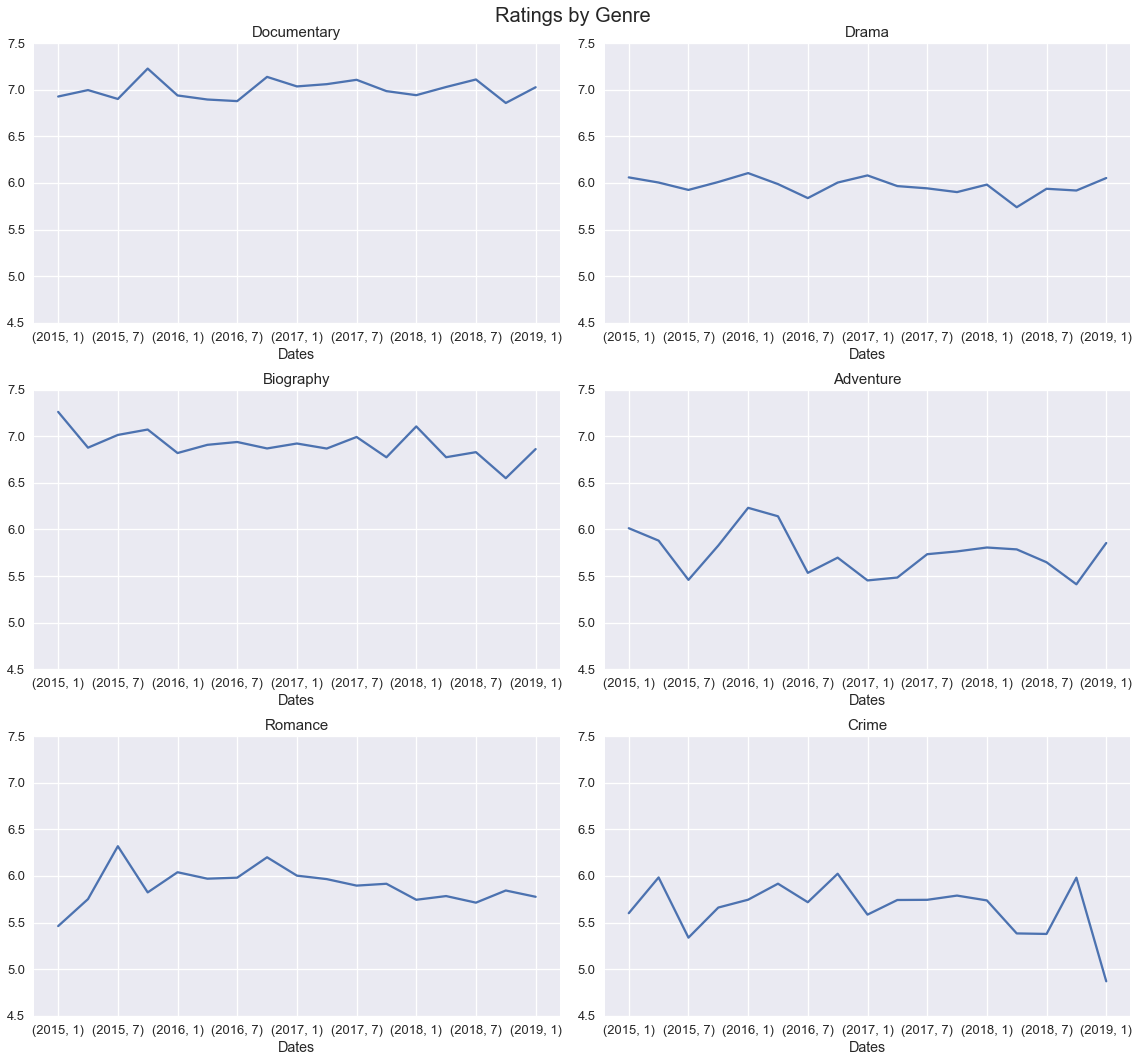

In [87]:
plt.style.use('seaborn-talk')

fig6, axes6 = plt.subplots(nrows=3,ncols=2, figsize=(16,15))

ax1 = axes6[0][0]
doc_df.groupby(by=[doc_df.index.year,doc_df.index.month])['averagerating'].median().plot(ax=ax1)
ax1.set_title('Documentary',fontsize=15)
ax1.set_xlabel('Dates')
ax1.set_yticks([(x*.5)+4.5 for x in range(7)]);

ax2 = axes6[0][1]
dra_df.groupby(by=[dra_df.index.year,dra_df.index.month])['averagerating'].median().plot(ax=ax2)
ax2.set_title('Drama',fontsize=15)
ax2.set_xlabel('Dates')
ax2.set_yticks([(x*.5)+4.5 for x in range(7)]);

ax3 = axes6[1][0]
bio_df.groupby(by=[bio_df.index.year,bio_df.index.month])['averagerating'].median().plot(ax=ax3)
ax3.set_title('Biography',fontsize=15)
ax3.set_xlabel('Dates')
ax3.set_yticks([(x*.5)+4.5 for x in range(7)]);

ax4 = axes6[1][1]
adv_df.groupby(by=[adv_df.index.year,adv_df.index.month])['averagerating'].median().plot(ax=ax4)
ax4.set_title('Adventure',fontsize=15)
ax4.set_xlabel('Dates')
ax4.set_yticks([(x*.5)+4.5 for x in range(7)]);

ax5 = axes6[2][0]
rom_df.groupby(by=[rom_df.index.year,rom_df.index.month])['averagerating'].median().plot(ax=ax5)
ax5.set_title('Romance',fontsize=15)
ax5.set_xlabel('Dates')
ax5.set_yticks([(x*.5)+4.5 for x in range(7)]);

ax6 = axes6[2][1]
cri_df.groupby(by=[cri_df.index.year,cri_df.index.month])['averagerating'].median().plot(ax=ax6)
ax6.set_title('Crime',fontsize=15)
ax6.set_xlabel('Dates')
ax6.set_yticks([(x*.5)+4.5 for x in range(7)]);

plt.suptitle('Ratings by Genre',fontsize=20)
fig6.tight_layout()
plt.savefig('images/rating_trends.png')

None of the top genres showed an uptrend in rating, while Crime and Biography were the only two to show a slight decline in recent years. This means ratings by genre are not likely to drastically change over time. 

### Are ratings and popularity correlated to profit?

In [88]:
corr_df = tn_budgets_df.join(imdb_df.set_index('primary_title'), on='title', how='left')
print(corr_df.shape)
corr_df.dropna(inplace=True)
corr_df.head(3)

(4217, 20)


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,genres_split,genre1,genre2,genre3
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,tt1298650,6.6,447624.0,2011-01-01,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action,Adventure,Fantasy
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,tt6565702,6.0,24451.0,2019-01-01,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,tt2395427,7.3,665594.0,2015-01-01,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi


In [89]:
heat_df = corr_df[['worldwide_profit','averagerating','production_budget','runtime_minutes']].corr()
heat_df

,worldwide_profit,averagerating,production_budget,runtime_minutes
worldwide_profit,1.000000,0.274381,0.624694,0.230680
averagerating,0.274381,1.000000,0.143969,0.355969
production_budget,0.624694,0.143969,1.000000,0.308506
runtime_minutes,0.230680,0.355969,0.308506,1.000000


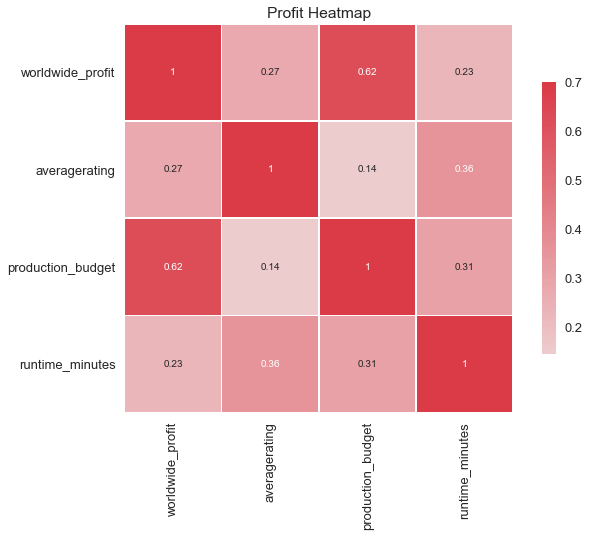

In [90]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(heat_df, vmax=.7, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink':.7}, annot=True)
plt.title('Profit Heatmap');
plt.savefig('images/heatmap1.png');

Profit has a moderate, positive correlation with production budget, but just a weak, positive correlation with ratings and runtime.

<hr style="border:1px solid gray"> </hr>

## Conclusions

Recommendations based on the analyses:
* **For better ratings, focus on producing the top genres: Documentary, Biography, Drama, Romance, and Adventure.** Alternatively, notice the genres with. poorer ratings: Horror, Sci-Fi, Thriller, Mystery, and Action.
* **Release movies during the optimal months: March, April, November, and December.** Consider the importance and popularity of these months.
* **Expect the genres to maintain similar ratings over the next few years.**

### Next Steps

Further analyses can help better understand ratings, genre, and profitability:
* **See what other correlations exist with ratings, profit, and other metrics.** Investigate these correlations.
* **See if certain dates (like holidays) affect ratings and profit.** Grouping by genre can also help determine what types of movies to release during these dates.
* **Try to forecast and predict certain metrics like profit and revenue.** This can be done with predictive modeling or time-series analysis.
